In [1]:
library(tidyverse)
library(glue)
library(dplyr)

install.packages("showtext")
install.packages("extrafont")
library(extrafont)
font_import()


theme_rangeframe <- function(size = 0.3) {
    theme(
        axis.line = element_line(colour = "black", lineend = "round", size = size),
        axis.ticks = element_line(linewidth = size),
        panel.border = element_blank()
    )
}

scale_axis_rangeframe <- function() {
    guides(x = "axis_truncated", y = "axis_truncated")
}

rotate_x_text <- function(angle=45) {
    theme(
        axis.text.x = element_text(angle = angle, hjust = 1)
    )
}

article_text <- function() {
    theme(
        text = element_text(size = 5, family = "Helvetica"),
        title = element_text(size = 6),
        axis.text.x = element_text(size = 5),
        axis.text.y = element_text(size = 5)
    )
}

no_legend <- function() {
    theme(
        legend.position = "none"
    )
}

no_margin <- function() {
    theme(
        plot.margin = margin(0, 0, 0, 0, unit = "lines")
    )
}

no_label <- function() {
    theme(
        axis.title = element_blank()
    )
}

no_text <- function() {
    theme(
        axis.title = element_blank(),
        axis.text = element_blank(),
        axis.ticks = element_blank()
    )
}

no_x_text <- function() {
    theme(
        axis.text.x = element_blank(),
        axis.ticks.x = element_blank()
    )
}

no_y_text <- function() {
    theme(
        axis.text.y = element_blank(),
        axis.ticks.y = element_blank()
    )
}


custom_theme <- function(size = 0.3){
    theme_minimal() +
    theme(
        text = element_text(family='Helvetica'),
        axis.line = element_line(colour = "black", lineend = "round", size = size),
        axis.ticks = element_line(linewidth = size),
        panel.border = element_blank()
    )

}
theme_set(custom_theme())

article_text <- function() {
    theme(
        text = element_text(size = 5, family = "Helvetica"),
        title = element_text(size = 6),
        axis.text.x = element_text(size = 5),
        axis.text.y = element_text(size = 5)
    )
}


Warning message:
“package ‘tidyverse’ was built under R version 4.2.3”
Warning message:
“package ‘tibble’ was built under R version 4.2.3”
Warning message:
“package ‘readr’ was built under R version 4.2.3”
Warning message:
“package ‘purrr’ was built under R version 4.2.3”
Warning message:
“package ‘dplyr’ was built under R version 4.2.3”
Warning message:
“package ‘stringr’ was built under R version 4.2.3”
Warning message:
“package ‘forcats’ was built under R version 4.2.3”
Warning message:
“package ‘lubridate’ was built under R version 4.2.3”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package 

Importing fonts may take a few minutes, depending on the number of fonts and the speed of the system.
Continue? [y/n]  y


Scanning ttf files in /usr/share/fonts/ ...

Extracting .afm files from .ttf files...

/usr/share/fonts/dejavu-sans-fonts/DejaVuSans-Bold.ttf
 : DejaVuSans-Bold already registered in fonts database. Skipping.

/usr/share/fonts/dejavu-sans-fonts/DejaVuSans-BoldOblique.ttf
 : DejaVuSans-BoldOblique already registered in fonts database. Skipping.

/usr/share/fonts/dejavu-sans-fonts/DejaVuSans-ExtraLight.ttf
 : DejaVuSans-ExtraLight already registered in fonts database. Skipping.

/usr/share/fonts/dejavu-sans-fonts/DejaVuSans-Oblique.ttf
 : DejaVuSans-Oblique already registered in fonts database. Skipping.

/usr/share/fonts/dejavu-sans-fonts/DejaVuSans.ttf
 : DejaVuSans already registered in fonts database. Skipping.

/usr/share/fonts/dejavu-sans-fonts/DejaVuSansCondensed-Bold.ttf
 : DejaVuSansCondensed-Bold already registered in fonts database. Skipping.

/usr/share/fonts/dejavu-sans-fonts/DejaVuSansCondensed-BoldOblique.ttf
 : DejaVuSansCondensed-BoldOblique already registered in fonts d

In [2]:
output_dir <- "/lustre/groups/ml01/workspace/ot_perturbation/figures/zebrafish/cell_type_proportion_changes"

In [3]:
data_dir <- "/lustre/groups/ml01/workspace/cell_flow_zebrafish/results/single_condition/cell_type_proportion_downstream"

New names:
• `` -> `...1`
Rows: 707 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6): index, Oligo, condition, gene_target, cell_type_broad_transfer, mode
dbl (8): ...1, ratio_oligo, ratio_true, logratio_true, logratio_pred, timepo...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
Warning message:
“Removed 17 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 17 rows containing missing values or values outside the scale range
(`geom_point()`).”


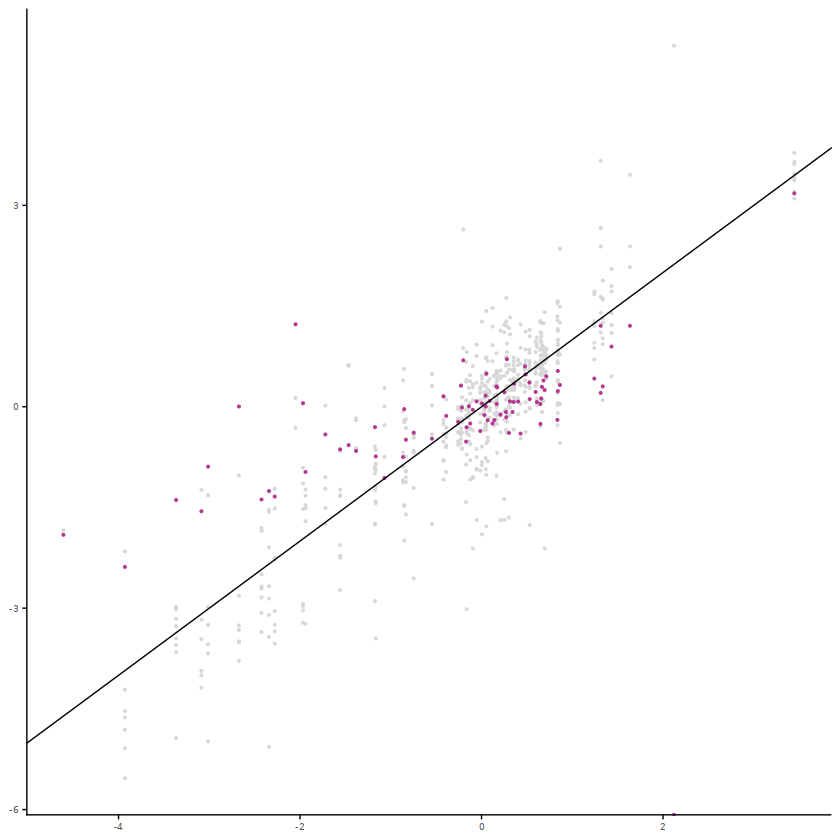

In [4]:
library(ggplot2)
library(readr)
library(glue)

df1 <- read_csv(file.path(data_dir, glue("logfoldchanges_tbx16_tbx16l_24.csv")))

# Remove NA and infinite values before computing range
valid_x <- df1$logratio_true[is.finite(df1$logratio_true)]
valid_y <- df1$logratio_pred[is.finite(df1$logratio_pred)]

# Compute axis limits ignoring NA and Inf values
x_limits <- range(valid_x, na.rm = TRUE)
y_limits <- range(valid_y, na.rm = TRUE)

p <- ggplot(df1, aes(x = logratio_true, y = logratio_pred, color = mode)) +
  scale_color_manual(values = c("CellFlow" = "#B12F8C", "single_oligo"="#D6D6D6")) +
  geom_point(size = 0.1, alpha = 0.9) +  # Adjusting point size and adding transparency
  geom_abline(slope = 1, intercept = 0, color="black", size=0.3) +
  coord_cartesian(xlim = x_limits, ylim = y_limits) +  # Apply computed limits
  custom_theme() +
  article_text() +
  no_legend() +
  theme(
    panel.grid.major = element_blank(), 
    panel.grid.minor = element_blank(),
    axis.title.x = element_blank(),
    axis.title.y = element_blank()
  )

# Uncomment to save the plot
ggsave(file.path(output_dir, glue("tbx16_tbx16l_24_scatter.pdf")), plot = p, device = "pdf", width = 2.3, height = 2.3, unit="cm")

print(p)


New names:
• `` -> `...1`
Rows: 699 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6): index, Oligo, condition, gene_target, cell_type_broad_transfer, mode
dbl (8): ...1, ratio_oligo, ratio_true, logratio_true, logratio_pred, timepo...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message:
“Removed 16 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 16 rows containing missing values or values outside the scale range
(`geom_point()`).”


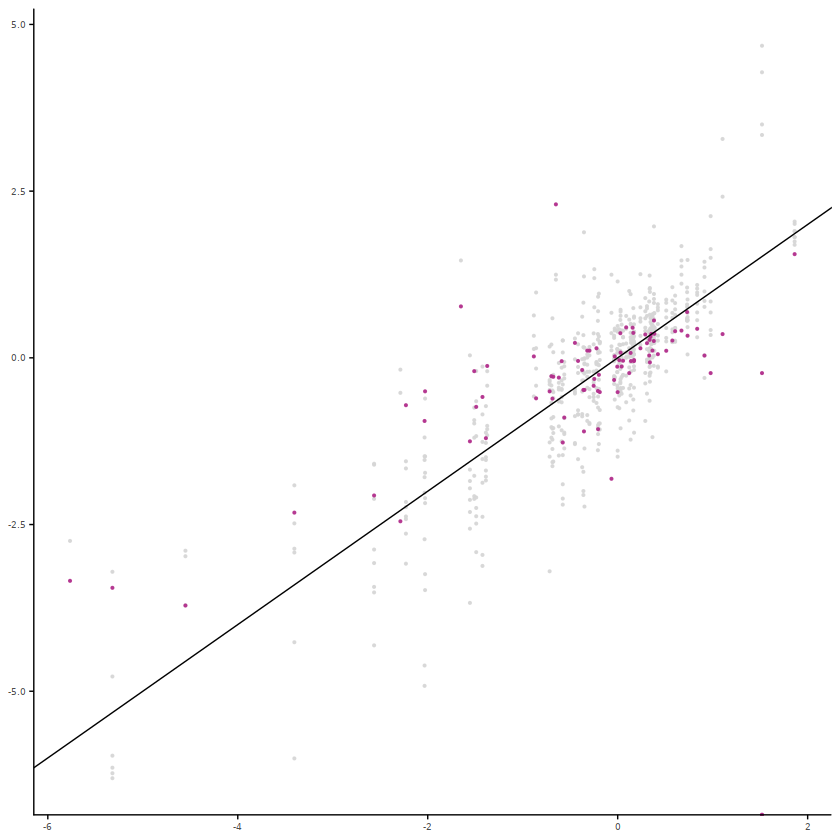

In [5]:
library(ggplot2)
library(readr)
library(glue)

df1 <- read_csv(file.path(data_dir, glue("logfoldchanges_tbx16_msgn1_18.csv")))

# Remove NA and infinite values before computing range
valid_x <- df1$logratio_true[is.finite(df1$logratio_true)]
valid_y <- df1$logratio_pred[is.finite(df1$logratio_pred)]

# Compute axis limits ignoring NA and Inf values
x_limits <- range(valid_x, na.rm = TRUE)
y_limits <- range(valid_y, na.rm = TRUE)

p <- ggplot(df1, aes(x = logratio_true, y = logratio_pred, color = mode)) +
  scale_color_manual(values = c("CellFlow" = "#B12F8C", "single_oligo"="#D6D6D6")) +
  geom_point(size = 0.1, alpha = 0.9) +  # Adjusting point size and adding transparency
  geom_abline(slope = 1, intercept = 0, color="black", size=0.3) +
  coord_cartesian(xlim = x_limits, ylim = y_limits) +  # Apply computed limits
  custom_theme() +
  article_text() +
  no_legend() +
  theme(
    panel.grid.major = element_blank(), 
    panel.grid.minor = element_blank(),
    axis.title.x = element_blank(),
    axis.title.y = element_blank()
  )

# Uncomment to save the plot
ggsave(file.path(output_dir, glue("tbx16_msgn1_18_scatter.pdf")), plot = p, device = "pdf", width = 2.3, height = 2.3, unit="cm")

print(p)


New names:
• `` -> `...1`
Rows: 881 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6): ...1, Oligo, condition, gene_target, cell_type_broad_transfer, mode
dbl (6): ratio_oligo, ratio_true, logratio_true, logratio_pred, timepoint, r...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


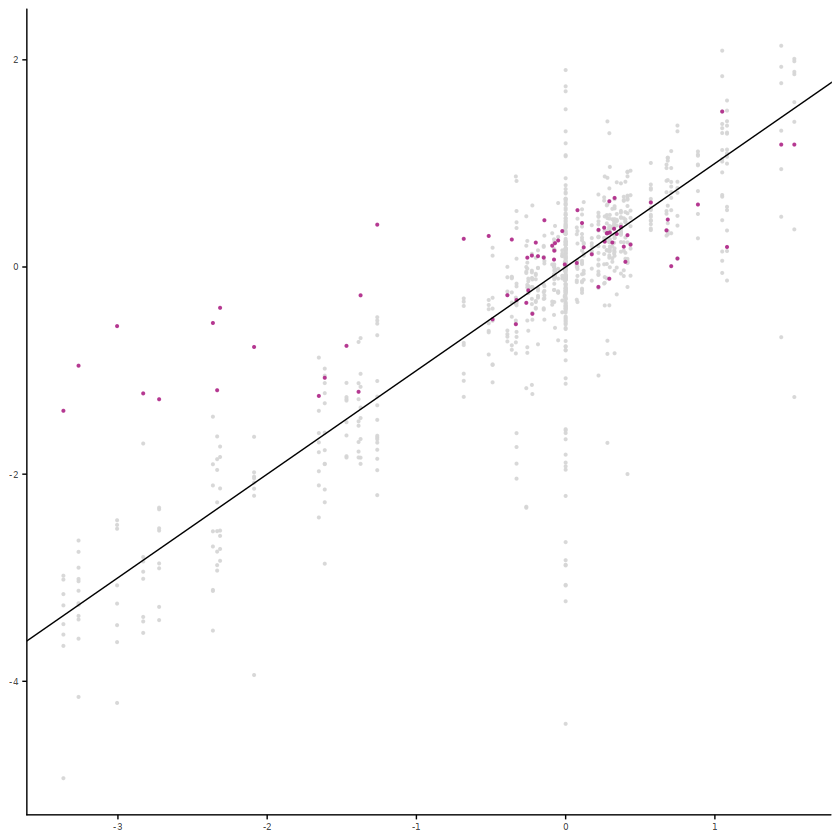

In [6]:
library(ggplot2)
library(readr)
library(glue)

df1 <- read_csv(file.path(data_dir, glue("logfoldchanges_mature_fast_muscle.csv")))

# Remove NA and infinite values before computing range
valid_x <- df1$logratio_true[is.finite(df1$logratio_true)]
valid_y <- df1$logratio_pred[is.finite(df1$logratio_pred)]

# Compute axis limits ignoring NA and Inf values
x_limits <- range(valid_x, na.rm = TRUE)
y_limits <- range(valid_y, na.rm = TRUE)

p <- ggplot(df1, aes(x = logratio_true, y = logratio_pred, color = mode)) +
  scale_color_manual(values = c("CellFlow" = "#B12F8C", "single_oligo"="#D6D6D6")) +
  geom_point(size = 0.1, alpha = 0.9) +  # Adjusting point size and adding transparency
  geom_abline(slope = 1, intercept = 0, color="black", size=0.3) +
  coord_cartesian(xlim = x_limits, ylim = y_limits) +  # Apply computed limits
  custom_theme() +
  article_text() +
  no_legend() +
  theme(
    panel.grid.major = element_blank(), 
    panel.grid.minor = element_blank(),
    axis.title.x = element_blank(),
    axis.title.y = element_blank()
  )

# Uncomment to save the plot
ggsave(file.path(output_dir, glue("mature_fast_muscle_scatter.pdf")), plot = p, device = "pdf", width = 2.3, height = 2.3, unit="cm")

print(p)


New names:
• `` -> `...1`
Rows: 881 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6): ...1, Oligo, condition, gene_target, cell_type_broad_transfer, mode
dbl (6): ratio_oligo, ratio_true, logratio_true, logratio_pred, timepoint, r...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


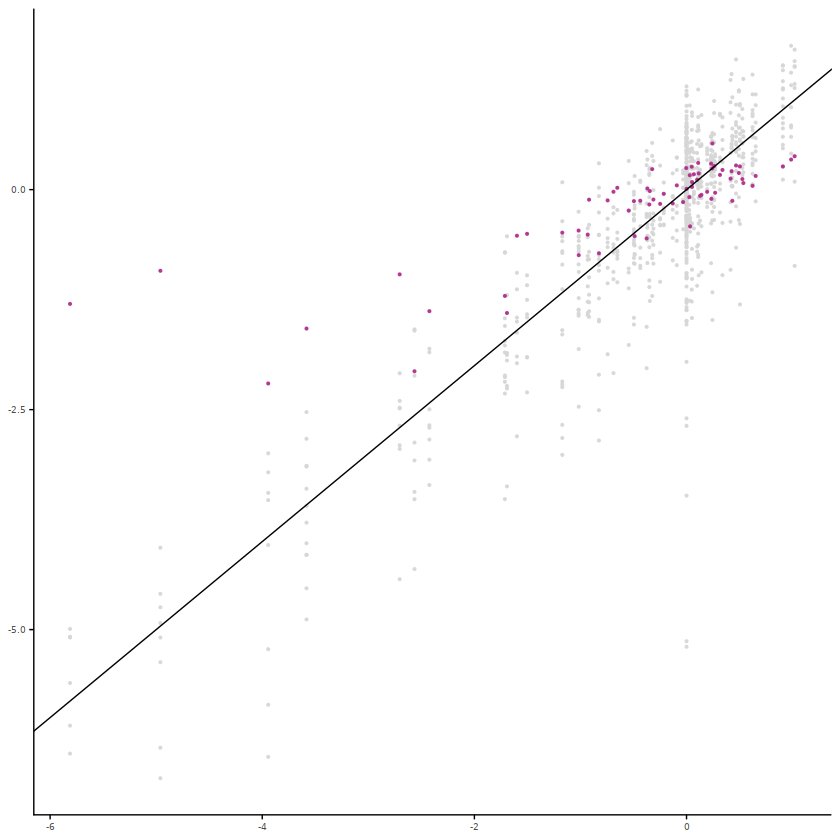

In [7]:
library(ggplot2)
library(readr)
library(glue)

df1 <- read_csv(file.path(data_dir, glue("logfoldchanges_mature_slow_muscle.csv")))

# Remove NA and infinite values before computing range
valid_x <- df1$logratio_true[is.finite(df1$logratio_true)]
valid_y <- df1$logratio_pred[is.finite(df1$logratio_pred)]

# Compute axis limits ignoring NA and Inf values
x_limits <- range(valid_x, na.rm = TRUE)
y_limits <- range(valid_y, na.rm = TRUE)

p <- ggplot(df1, aes(x = logratio_true, y = logratio_pred, color = mode)) +
  scale_color_manual(values = c("CellFlow" = "#B12F8C", "single_oligo"="#D6D6D6")) +
  geom_point(size = 0.1, alpha = 0.9) +  # Adjusting point size and adding transparency
  geom_abline(slope = 1, intercept = 0, color="black", size=0.3) +
  coord_cartesian(xlim = x_limits, ylim = y_limits) +  # Apply computed limits
  custom_theme() +
  article_text() +
  no_legend() +
  theme(
    panel.grid.major = element_blank(), 
    panel.grid.minor = element_blank(),
    axis.title.x = element_blank(),
    axis.title.y = element_blank()
  )

# Uncomment to save the plot
ggsave(file.path(output_dir, glue("mature_slow_muscle_scatter.pdf")), plot = p, device = "pdf", width = 2.3, height = 2.3, unit="cm")

print(p)


New names:
• `` -> `...1`
Rows: 732 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6): index, Oligo, condition, gene_target, cell_type_broad_transfer, mode
dbl (8): ...1, ratio_oligo, ratio_true, logratio_true, logratio_pred, timepo...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message:
“Removed 10 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 10 rows containing missing values or values outside the scale range
(`geom_point()`).”


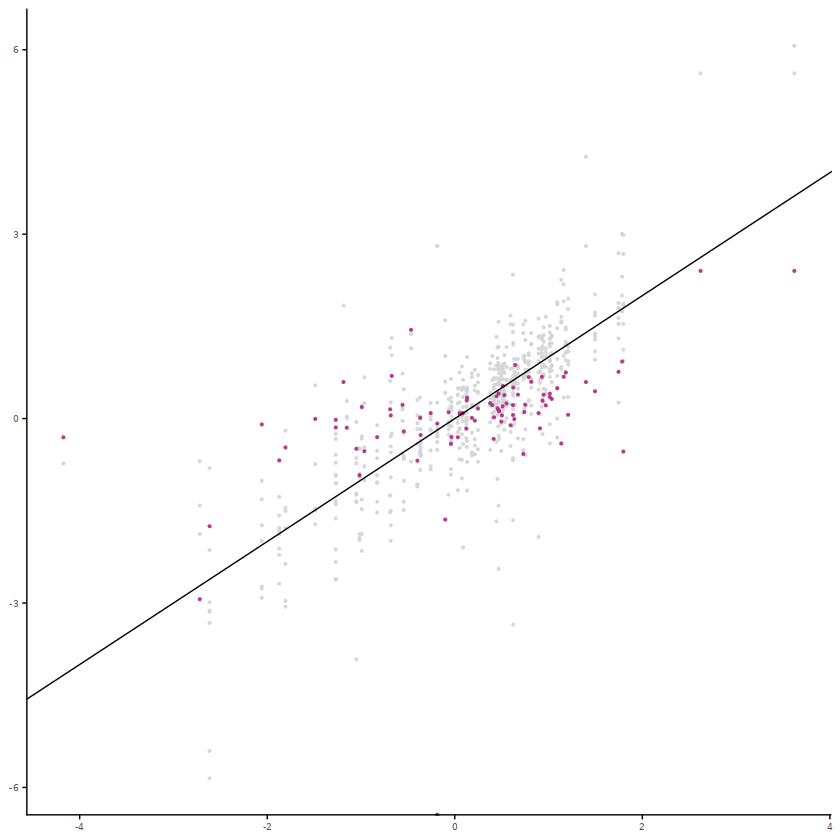

In [8]:
library(ggplot2)
library(readr)
library(glue)

df1 <- read_csv(file.path(data_dir, glue("logfoldchanges_cdx4_cdx1a_36.csv")))

# Remove NA and infinite values before computing range
valid_x <- df1$logratio_true[is.finite(df1$logratio_true)]
valid_y <- df1$logratio_pred[is.finite(df1$logratio_pred)]

# Compute axis limits ignoring NA and Inf values
x_limits <- range(valid_x, na.rm = TRUE)
y_limits <- range(valid_y, na.rm = TRUE)

p <- ggplot(df1, aes(x = logratio_true, y = logratio_pred, color = mode)) +
  scale_color_manual(values = c("CellFlow" = "#B12F8C", "single_oligo"="#D6D6D6")) +
  geom_point(size = 0.1, alpha = 0.9) +  # Adjusting point size and adding transparency
  geom_abline(slope = 1, intercept = 0, color="black", size=0.3) +
  coord_cartesian(xlim = x_limits, ylim = y_limits) +  # Apply computed limits
  custom_theme() +
  article_text() +
  no_legend() +
  theme(
    panel.grid.major = element_blank(), 
    panel.grid.minor = element_blank(),
    axis.title.x = element_blank(),
    axis.title.y = element_blank()
  )

# Uncomment to save the plot
ggsave(file.path(output_dir, glue("cdx4_cdx1a_36.pdf")), plot = p, device = "pdf", width = 2.3, height = 2.3, unit="cm")

print(p)


New names:
• `` -> `...1`
Rows: 741 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6): index, Oligo, condition, gene_target, cell_type_broad_transfer, mode
dbl (8): ...1, ratio_oligo, ratio_true, logratio_true, logratio_pred, timepo...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message:
“Removed 13 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 13 rows containing missing values or values outside the scale range
(`geom_point()`).”


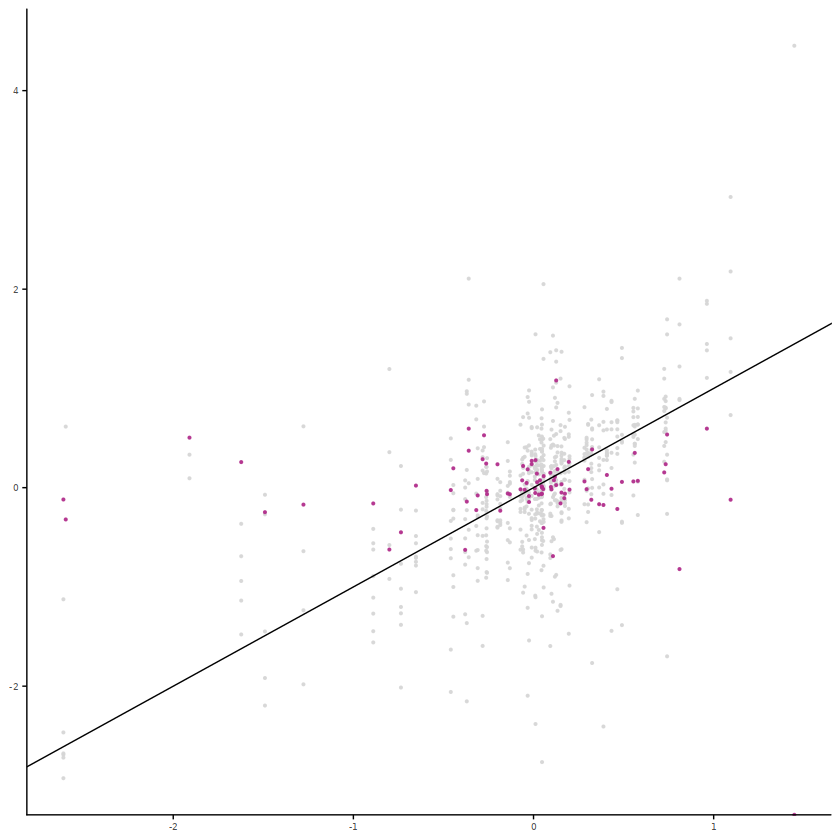

In [9]:
library(ggplot2)
library(readr)
library(glue)

df1 <- read_csv(file.path(data_dir, glue("logfoldchanges_phox2a_control_36.csv")))

# Remove NA and infinite values before computing range
valid_x <- df1$logratio_true[is.finite(df1$logratio_true)]
valid_y <- df1$logratio_pred[is.finite(df1$logratio_pred)]

# Compute axis limits ignoring NA and Inf values
x_limits <- range(valid_x, na.rm = TRUE)
y_limits <- range(valid_y, na.rm = TRUE)

p <- ggplot(df1, aes(x = logratio_true, y = logratio_pred, color = mode)) +
  scale_color_manual(values = c("CellFlow" = "#B12F8C", "single_oligo"="#D6D6D6")) +
  geom_point(size = 0.1, alpha = 0.9) +  # Adjusting point size and adding transparency
  geom_abline(slope = 1, intercept = 0, color="black", size=0.3) +
  coord_cartesian(xlim = x_limits, ylim = y_limits) +  # Apply computed limits
  custom_theme() +
  article_text() +
  no_legend() +
  theme(
    panel.grid.major = element_blank(), 
    panel.grid.minor = element_blank(),
    axis.title.x = element_blank(),
    axis.title.y = element_blank()
  )

# Uncomment to save the plot
ggsave(file.path(output_dir, glue("mature_phox2a_control_36.pdf")), plot = p, device = "pdf", width = 2.3, height = 2.3, unit="cm")

print(p)
